Nous sommes un fonds d'investissement actif sur le marché de l'immobilier et nous souhaitons développer notre activité dans la ville de Ames. Nous avons besoin pour cela de prédictions précises des prix immobiliers pour prendre des décisions éclairées.Dans ce but, nous voulons développer un modèle de machine learning qui prédit les prix des maisons en se basant sur diverses caractéristiques telles que la taille de la maison, l'emplacement et d'autres attributs. Le modèle utilisera des techniques d'apprentissage supervisé avec des modèles de régression pour fournir les prix du marché, aidant ainsi à des décisions d'achat et d'investissement stratégiques. Afin de mener à bien notre projet, nous allons travailler en collaboration avec une agence immobilière de la ville de Ames car elle peut nous fournir des données précises et adéquates qui nous permettront d'atteindre les objectifs fixés dans notre Ml Canvas et explicités ci-desous:

Sources de données:
- Agences immobilières locales : Fournissent des listings détaillés de propriétés, des données historiques de ventes et des conditions actuelles du marché.

Collecte de données : 
- Rassembler des ensembles de données complets auprès des agences immobilières, incluant les caractéristiques des propriétés, les données transactionnelles historiques et les conditions du marché.
- Nettoyage et prétraitement des données : Assurer la qualité des données en gérant les valeurs manquantes, en normalisant les caractéristiques et en transformant les variables catégorielles.

Construction du modèle:
- Développement du modèle : Développer un modèle de régression linéaire pour prédire les prix des maisons.
- Entraînement et évaluation du modèle : Diviser les données en ensembles d'entraînement et de test, entraîner le modèle et évaluer ses performances en utilisant RMSLE (Root Mean Squared Logarithmic Error).
- Déploiement du modèle : Déployer le modèle pour des prédictions en temps réel et l'intégrer aux interfaces utilisateur pour une accessibilité facile.
 
Proposition de Valeur
- Pour les agences immobilières : Accélérer le processus de vente en fournissant des prédictions de prix précises, assurant des stratégies de tarification compétitives.
- Pour les investisseurs : Identifier les propriétés sous-évaluées et gérer les risques d'investissement, avec un objectif de marge bénéficiaire de 20%.
- Pour les vendeurs de maisons : Prendre des décisions de vente éclairées basées sur des estimations de prix fiables, évitant de vendre à perte.
 
Decisions
- Agences Immobilières : Bénéficient de cycles de vente plus rapides et de meilleures stratégies de tarification.
- Acheteurs Individuels : Utilisent les prédictions pour trouver des maisons à un prix équitable.
- Investisseurs et fonds spéculatifs : Identifient et investissent dans des propriétés sous-évaluées pour maximiser les retours sur investissement.
 
 Tâches de predictions
- Données : Données de haute qualité sur les propriétés et les transactions fournies par les agences immobilières.
- Technologie : Infrastructure robuste de machine learning pour l'entraînement et le déploiement du modèle.
- Expertise : Data scientists et experts immobiliers pour développer et affiner les modèles de prédiction.
 
 Faire des prédictions
- Réajuster les modèles en fonction des retours sur investissements réels
 
 Simulation d'impact

 
 Attributs (features)

 
 Indicateurs Clés (live monitoring)
- Précision du Modèle (RMSLE) : Mesurer la précision des prédictions du modèle en utilisant l'erreur quadratique moyenne logarithmique.
- Marge Bénéficiaire : Suivre la marge de profit réalisée à partir des investissements immobiliers identifiés par le modèle.
  

Notre modèle de prédiction des prix immobiliers vise à révolutionner le marché immobilier en fournissant des estimations de prix précises et basées sur les données. En tirant parti de l'apprentissage automatique, il aide les agences immobilières, les investisseurs et les acheteurs à prendre des décisions éclairées, menant à des ventes plus rapides, de meilleurs investissements et des clients plus satisfaits. Le modèle sera initialement testé à Ames, avec des plans d'expansion basés sur son succès.
 

Pour notre projet, nous commencons par importer toutes les librairies qui nous seront utiles et nécéssaires.

In [462]:
#!pip install optuna
#!pip install catboost
#!pip install pandas
#!pip install numpy
#!pip install xgboost
#!pip install catboost
#!pip install matplotlib
#!pip install seaborn
#!pip install optuna
#!pip install scipy
#!pip install scikit-learn
#!pip install category_encoders
#!pip install lightgbm
#!pip install shap
#pip install kaggle

In [463]:

# Igonore Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Manipulation
import pandas as pd
import numpy as np
import xgboost as xgb
import catboost

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import optuna
import lightgbm as lgb
from optuna.samplers import TPESampler
import optuna.visualization as vis
import shap

# Data Transformation
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.preprocessing import StandardScaler
from math import sqrt

# Feature Selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LassoCV

# Pipeline
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import TargetEncoder

# Regression Algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn.base import BaseEstimator, TransformerMixin

from datetime import datetime

Nous chargeons le jeu de données fourni par notre agence immobilière partenaire. La colonne ID est utilisée comme index de la dataframe.

In [464]:
train = pd.read_csv("train.csv", index_col= "Id")
train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Cette commande permet de visualiser les informations contenues dans le dataframe.

In [465]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

Les valeurs nulles sont identifiées dans toutes les colonnes.

In [466]:
train.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

Permet d'obtenir le nombre de lignes et de colonnes du dataframe.

In [467]:
train.shape

(1460, 80)

Génére un résumé statistique des données en incluant des informations pour toutes les colonnes.

In [468]:
train.describe(include="all")

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


ces commandes sont utilisées pour créer un résumé des valeurs manquantes dans le DataFrame train, en indiquant le nombre de valeurs manquantes et le pourcentage de valeurs manquantes pour chaque colonne, triées par ordre décroissant de pourcentage de valeurs manquantes.

In [469]:
train_na = train.isna().sum().reset_index(name="missing values")
train_na["%"] = round((train_na["missing values"] / train.shape[0])*100, 2)
train_na.sort_values(by="%", ascending=False)

,index,missing values,%
71,PoolQC,1453,99.52
73,MiscFeature,1406,96.30
5,Alley,1369,93.77
72,Fence,1179,80.75
24,MasVnrType,872,59.73
...,...,...,...
38,Heating,0,0.00
39,HeatingQC,0,0.00
1,MSZoning,0,0.00
42,1stFlrSF,0,0.00


Ces commandes utilisent la librairie scikit-learn pour la régression linéaire, la division des données, le calcul des métriques d'évaluation et la validation croisée. Les métriques utilisées ici sont le RMSLE et le négatif du Mean Squared Logarithmic Error (NMSLE), converti en RMSLE pour l'affichage.

In [470]:
# Select features for the baseline model
features = ['OverallQual', 'OverallCond', 'GrLivArea', 'TotalBsmtSF', 'GarageArea',
            'FullBath', 'HalfBath', 'BedroomAbvGr']
X = train[features]
y = np.log1p(train['SalePrice'])  # Log transform the target variable

# Define the linear regression model
model = LinearRegression()

# Cross-validation of the model
cv_scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)

# Convert the negative mean squared log error to positive RMSLE
rmsle_cv_scores = np.sqrt(-cv_scores)

# Output of the scores
print("CV Scores: ", rmsle_cv_scores)
# Output of the average score
print("Average CV Score: ", np.mean(rmsle_cv_scores))

CV Scores:  [0.16328195 0.18917761 0.16900299 0.15177319 0.22330228]
Average CV Score:  0.17930760486775665


Ces commandes permettent d'obtenir les visualisations qui sont utilisées pour évaluer les performances du modèle de régression linéaire et pour examiner la distribution des résidus et des valeurs prédites par rapport aux valeurs réelles de la variable cible. Si le modèle est performant, la distribution des valeurs prédites devrait être similaire à celle des valeurs réelles.

In [471]:
# Custom transformer to convert year columns to age columns
class YearToAgeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, current_year):
        self.current_year = current_year

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for col in X.columns:
            X[col] = self.current_year - X[col]
        return X

# Define current year using datetime module
current_year = datetime.now().year

# Identify the year columns
year_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

# Define feature sets
numerical_cols = [col for col in train.select_dtypes(include=['int64', 'float64']).columns if col not in year_cols and col != 'SalePrice']
ordinal_features = [
    'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
    'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
    'PoolQC', 'Fence'
]
nominal_features = [col for col in train.select_dtypes(include=['object']).columns if col not in ordinal_features]

# Define ordinal categories
ordinal_categories = {
    'OverallQual': list(range(1, 11)),
    'OverallCond': list(range(1, 11)),
    'ExterQual': ['NA','Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond': ['NA','Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtExposure': ['NA', 'No', 'Mn', 'Av', 'Gd'],
    'BsmtFinType1': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'BsmtFinType2': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'HeatingQC': ['NA','Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'KitchenQual': ['NA','Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Functional': ['NA','Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
    'FireplaceQu': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageFinish': ['NA', 'Unf', 'RFn', 'Fin'],
    'GarageQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'PoolQC': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Fence': ['NA', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']
}

# Transformers
numeric_transformer = Pipeline(steps=[
    ("year_to_age", YearToAgeTransformer(current_year=current_year)),
    ("imputer", SimpleImputer(strategy='constant', fill_value=0)),  # Using constant strategy for numerical columns with 0 as fill value
    ("scaler", StandardScaler())
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),  # Use 'NA' as the fill value for missing ordinal data
    ('encoder', OrdinalEncoder(categories=[ordinal_categories[col] for col in ordinal_features], handle_unknown='use_encoded_value', unknown_value=-1))
])

nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),  # Use 'NA' as the fill value for missing nominal data
    ('encoder', TargetEncoder())
])

# Combine new features with existing transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('ord', ordinal_transformer, ordinal_features),
        ('nom', nominal_transformer, nominal_features),
        ('year', 'passthrough', year_cols)
    ],
    remainder='passthrough'  # Add this to handle remaining columns
)

# Final pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('global_imputer', SimpleImputer(strategy='constant', fill_value=0))  # Add global imputer to handle any remaining NaNs with 0
])


In [472]:
# Fit and transform the data
X_preprocessed = pipeline.fit_transform(train.drop(columns='SalePrice'), train['SalePrice'])

# Get feature names
numerical_feature_names = numerical_cols
ordinal_feature_names = ordinal_features
nominal_feature_names = list(pipeline.named_steps['preprocessor'].named_transformers_['nom'].named_steps['encoder'].get_feature_names_out())
year_feature_names = year_cols

# Combine all feature names
all_feature_names = numerical_feature_names + ordinal_feature_names + nominal_feature_names + year_feature_names

# Convert all feature names to strings
all_feature_names = [str(name) for name in all_feature_names]

# Convert back to DataFrame
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=all_feature_names)

# Ensure all columns are strings
X_preprocessed_df.columns = X_preprocessed_df.columns.astype(str)

# Check for NaNs
print(f'Number of NaN values in X_preprocessed: {np.isnan(X_preprocessed_df).sum().sum()}')

Number of NaN values in X_preprocessed: 0


In [473]:
# Transform the target variable
y_transformed = np.log1p(train['SalePrice'])

Lasso CV Scores:  [0.12004385 0.15546669 0.1403886  0.13002062 0.17374527]
Average Lasso CV Score:  0.14393300586246618


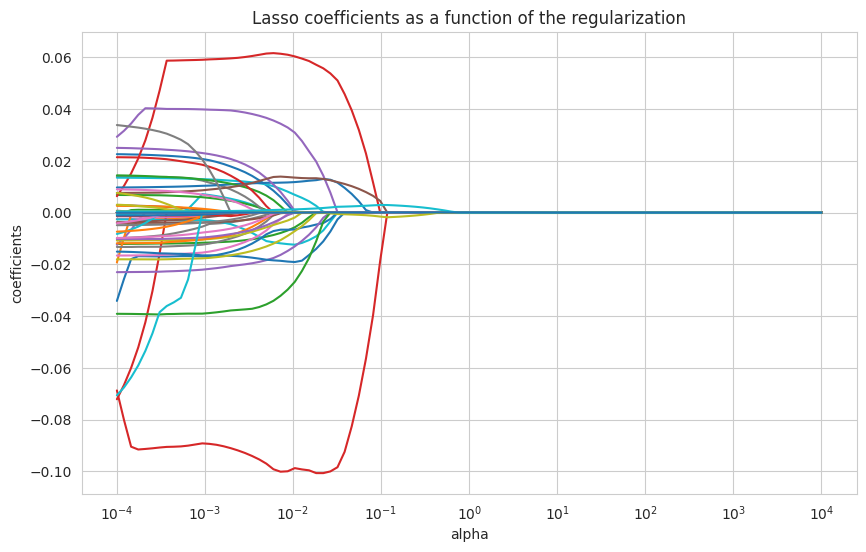

In [474]:
# Define the Lasso model
lasso = Lasso()

# Set up the hyperparameters for GridSearchCV
lasso_params = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0, 200.0]}

# Use GridSearchCV to find the best hyperparameters with cross-validation
lasso_cv = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_preprocessed, y_transformed)

# Get the best Lasso model
best_lasso = lasso_cv.best_estimator_

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_lasso, X_preprocessed, y_transformed, cv=5, scoring='neg_mean_squared_error')
rmsle_cv_scores = np.sqrt(-cv_scores)

# Print the cross-validation results
print("Lasso CV Scores: ", rmsle_cv_scores)
print("Average Lasso CV Score: ", np.mean(rmsle_cv_scores))

# Visualize coefficients as a function of regularization
alphas = np.logspace(-4, 4, 100)
coefs = []

for alpha in alphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(X_preprocessed, y_transformed)
    coefs.append(lasso.coef_)

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

Ridge CV Scores:  [0.11503262 0.14773295 0.13145053 0.12301295 0.16842786]
Average Ridge CV Score:  0.13713138263693098


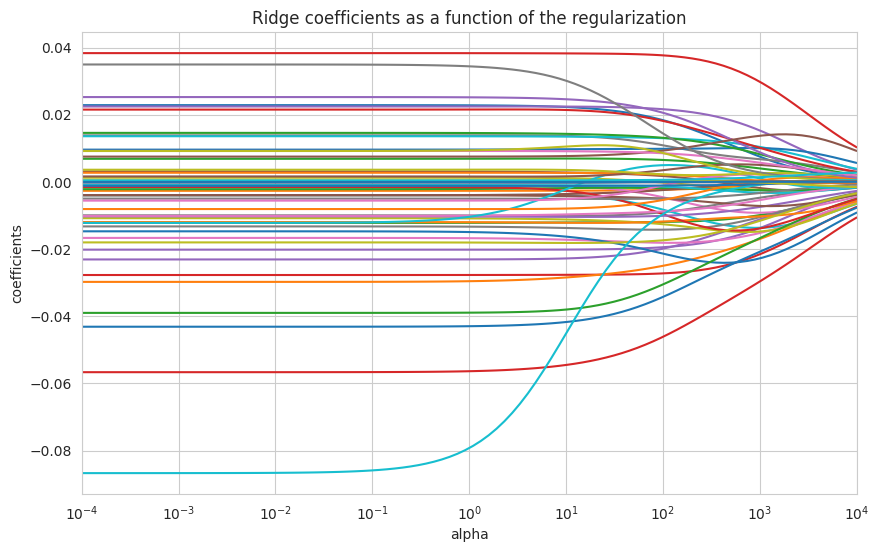

In [475]:
# Define the Ridge model
ridge = Ridge()

# Set up the hyperparameters for GridSearchCV
ridge_params = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0, 200.0]}

# Use GridSearchCV to find the best hyperparameters with cross-validation
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_preprocessed, y_transformed)

# Get the best Ridge model
best_ridge = ridge_cv.best_estimator_

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_ridge, X_preprocessed, y_transformed, cv=5, scoring='neg_mean_squared_error')
rmse_cv_scores = np.sqrt(-cv_scores)

# Print the cross-validation results
print("Ridge CV Scores: ", rmse_cv_scores)
print("Average Ridge CV Score: ", np.mean(rmse_cv_scores))

# Visualize coefficients as a function of regularization
alphas = np.logspace(-4, 4, 100)
coefs = []

for alpha in alphas:
    ridge.set_params(alpha=alpha)
    ridge.fit(X_preprocessed, y_transformed)
    coefs.append(ridge.coef_)

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.xlim([min(alphas), max(alphas)])
plt.show()

Elastic Net CV Scores:  [0.11484554 0.14893955 0.13012793 0.12260364 0.17393467]
Average Elastic Net CV Score:  0.13809026531585472


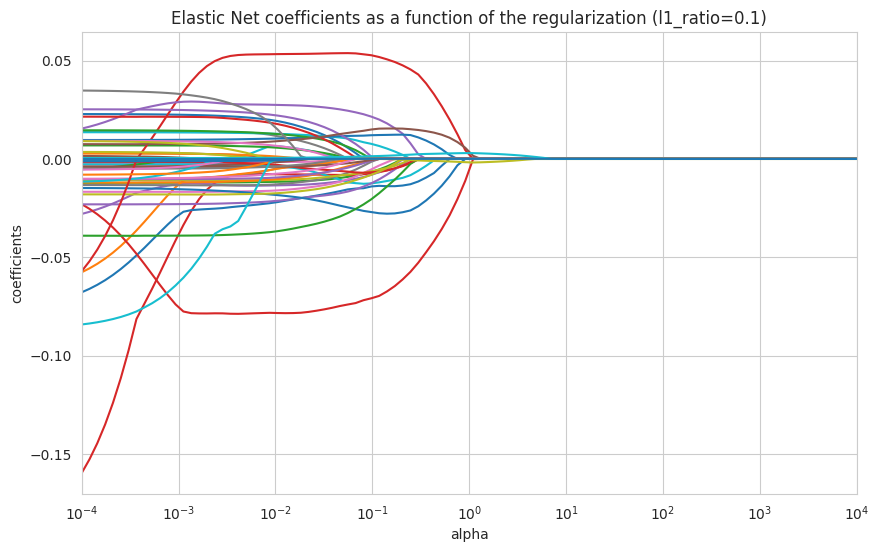

In [476]:
# Define the Elastic Net model
elastic_net = ElasticNet()

# Set up the hyperparameters for GridSearchCV
elastic_net_params = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0, 200.0],
    'l1_ratio': [0.1, 0.5, 0.7, 1.0]
}

# Use GridSearchCV to find the best hyperparameters with cross-validation
elastic_net_cv = GridSearchCV(elastic_net, elastic_net_params, cv=5, scoring='neg_mean_squared_error')
elastic_net_cv.fit(X_preprocessed, y_transformed)

# Get the best Elastic Net model
best_elastic_net = elastic_net_cv.best_estimator_

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_elastic_net, X_preprocessed, y_transformed, cv=5, scoring='neg_mean_squared_error')
rmse_cv_scores = np.sqrt(-cv_scores)

# Print the cross-validation results
print("Elastic Net CV Scores: ", rmse_cv_scores)
print("Average Elastic Net CV Score: ", np.mean(rmse_cv_scores))

# Visualize coefficients as a function of regularization
best_l1_ratio = best_elastic_net.l1_ratio
alphas = np.logspace(-4, 4, 100)
coefs = []

for alpha in alphas:
    elastic_net.set_params(alpha=alpha, l1_ratio=best_l1_ratio)
    elastic_net.fit(X_preprocessed, y_transformed)
    coefs.append(elastic_net.coef_)

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title(f'Elastic Net coefficients as a function of the regularization (l1_ratio={best_l1_ratio})')
plt.axis('tight')
plt.xlim([min(alphas), max(alphas)])  # Ensure the x-axis limits cover the full range of alphas
plt.show()

[I 2024-05-23 20:49:31,162] A new study created in memory with name: no-name-65e9d8dc-1d37-4bca-996d-c07c320db64f
[I 2024-05-23 20:49:38,720] Trial 0 finished with value: 0.13434781432199752 and parameters: {'n_estimators': 144, 'max_depth': 7, 'learning_rate': 0.08960785365368121, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.13434781432199752.
[I 2024-05-23 20:49:40,800] Trial 1 finished with value: 0.12736265519596596 and parameters: {'n_estimators': 89, 'max_depth': 3, 'learning_rate': 0.13394334706750485, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.12736265519596596.
[I 2024-05-23 20:49:43,757] Trial 2 finished with value: 0.13610556941533555 and parameters: {'n_estimators': 55, 'max_depth': 7, 'learning_rate': 0.12106896936002161, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.12736265519596596.
[I 2024-05-23 20:49:46,705] Trial 3 finished with value: 0.12840576577296528 and parameter

Best trial: {'n_estimators': 279, 'max_depth': 3, 'learning_rate': 0.0577775143486706, 'min_samples_split': 10, 'min_samples_leaf': 1}


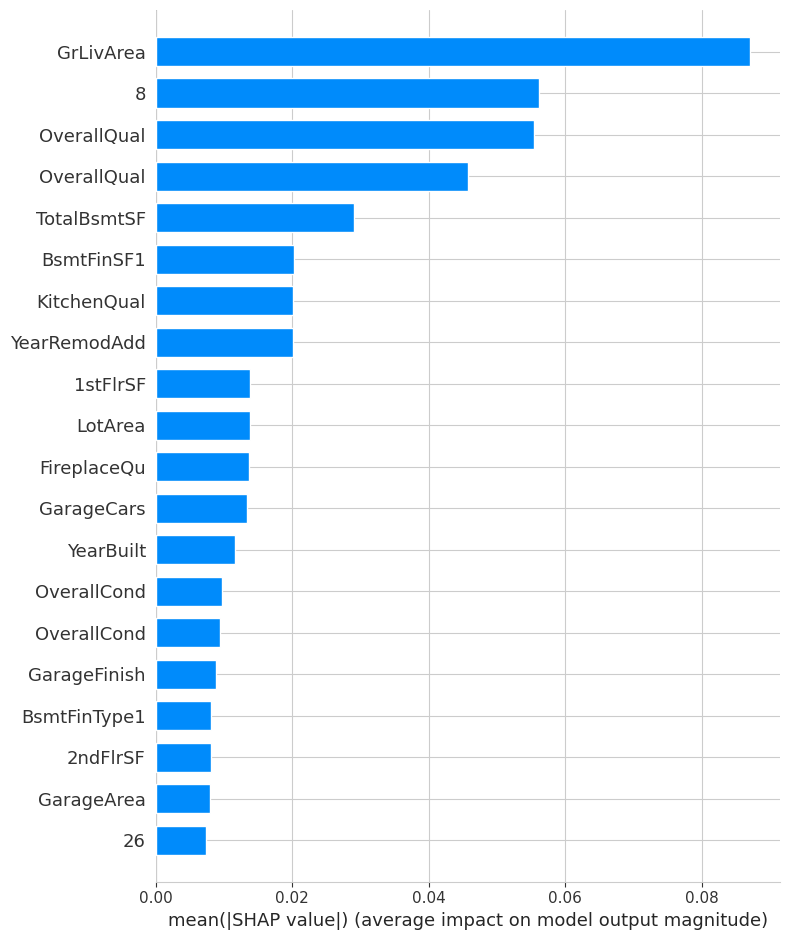

Best RMSLE: 0.122665808493479


In [477]:
# Define the objective function for Optuna using RMSLE
def objective(trial):
    # Suggest hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 3, 7)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.2)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)
    
    # Initialize the model with suggested hyperparameters
    model = GradientBoostingRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    # Use cross-validation to evaluate the model
    cv_scores = cross_val_score(model, X_preprocessed_df, y_transformed, cv=5, scoring='neg_mean_squared_error')
    rmsle_cv_scores = np.sqrt(-cv_scores)
    
    # Return the average RMSLE score
    return np.mean(rmsle_cv_scores)

# Create a study object and optimize the objective function
study = optuna.create_study(direction='minimize', sampler=TPESampler(seed=42))
study.optimize(objective, n_trials=100)

# Get the best trial
best_trial = study.best_trial
print(f'Best trial: {best_trial.params}')

# Train the model with the best parameters
best_params = best_trial.params
best_boosting_model = GradientBoostingRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)
best_boosting_model.fit(X_preprocessed_df, y_transformed)

# Initialize the SHAP Explainer
explainer = shap.Explainer(best_boosting_model)

# Calculate SHAP values for the preprocessed data
shap_values = explainer(X_preprocessed_df)

# Visualize the SHAP values with a summary plot
shap.summary_plot(shap_values, X_preprocessed_df, plot_type="bar")

# Use the cross-validation RMSLE from the best trial for the final evaluation
best_rmsle = study.best_value
print(f'Best RMSLE: {best_rmsle}')


In [478]:
# Optimization History
fig1 = vis.plot_optimization_history(study)
fig1.update_layout(title='Optimization History for Gradient Boosting Regressor')
fig1.show()

In [479]:
# Hyperparameter Importance
fig2 = vis.plot_param_importances(study)
fig2.update_layout(title='Hyperparameter Importance for Gradient Boosting Regressor')
fig2.show()

In [480]:
# Parallel Coordinate Plot
fig3 = vis.plot_parallel_coordinate(study)
fig3.update_layout(title='Parallel Coordinate Plot for Gradient Boosting Regressor')
fig3.show()

In [481]:
# Slice Plot
fig4 = vis.plot_slice(study)
fig4.update_layout(title='Slice Plot for Gradient Boosting Regressor')
fig4.show()

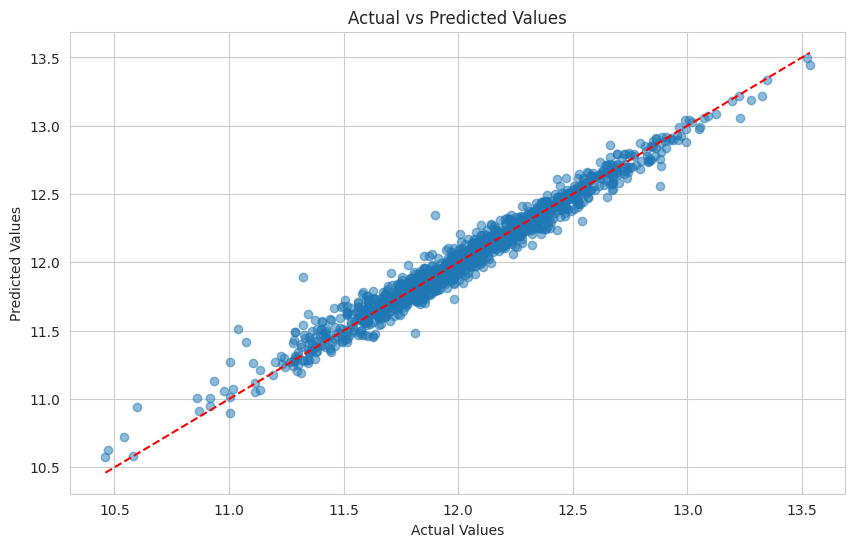

In [482]:
# Predict on the entire dataset with the best model
y_pred_best = best_boosting_model.predict(X_preprocessed_df)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_transformed, y_pred_best, alpha=0.5)
plt.plot([min(y_transformed), max(y_transformed)], [min(y_transformed), max(y_transformed)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

[I 2024-05-23 21:00:22,432] A new study created in memory with name: no-name-7d6671eb-be02-4de5-958f-4626ea2e1824
[I 2024-05-23 21:00:23,432] Trial 0 finished with value: 0.14547472718229554 and parameters: {'n_estimators': 144, 'learning_rate': 0.28570714885887566, 'max_depth': 8, 'subsample': 0.7993292420985183, 'colsample_bytree': 0.5780093202212182, 'reg_alpha': 0.15599452033620265, 'reg_lambda': 0.05808361216819946}. Best is trial 0 with value: 0.14547472718229554.
[I 2024-05-23 21:00:25,092] Trial 1 finished with value: 0.1398307078417212 and parameters: {'n_estimators': 267, 'learning_rate': 0.18432335340553055, 'max_depth': 8, 'subsample': 0.5102922471479012, 'colsample_bytree': 0.9849549260809971, 'reg_alpha': 0.8324426408004217, 'reg_lambda': 0.21233911067827616}. Best is trial 1 with value: 0.1398307078417212.
[I 2024-05-23 21:00:25,644] Trial 2 finished with value: 0.12553570699553057 and parameters: {'n_estimators': 95, 'learning_rate': 0.06318730785749581, 'max_depth': 5,

Best trial for XGBoost Regressor: {'n_estimators': 242, 'learning_rate': 0.03921431639281435, 'max_depth': 5, 'subsample': 0.5383487173489728, 'colsample_bytree': 0.5562964634378693, 'reg_alpha': 0.09459086094911387, 'reg_lambda': 0.0800745692305434}


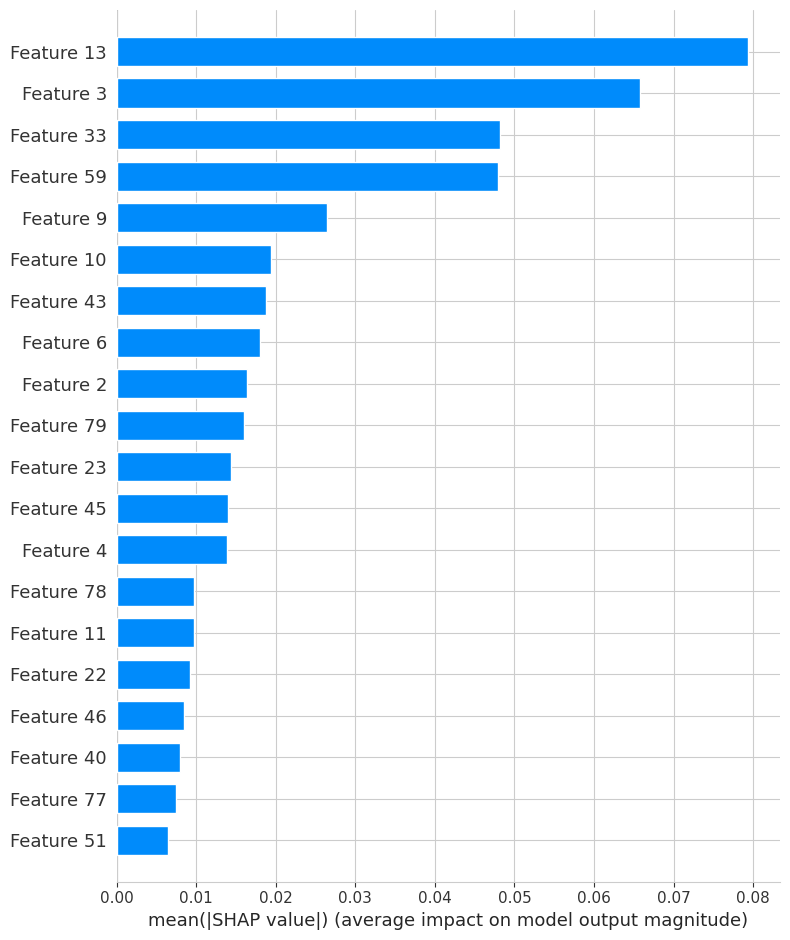

Best RMSLE: 0.12076887466775157


In [483]:
# Define the objective function
def objective_xgbr(trial, return_model=False):
    # Define hyperparameters
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0)
    }
    
    # Initialize model
    model = XGBRegressor(**params)
    
    # Perform cross-validation with RMSLE as the scoring metric
    cv_scores = cross_val_score(model, X_preprocessed_df, y_transformed, cv=5, scoring='neg_mean_squared_error')
    
    # Convert negative mean squared error to positive RMSLE
    rmsle_scores = np.sqrt(-cv_scores)
    mean_rmsle = np.mean(rmsle_scores)
    
    if return_model:
        model.fit(X_preprocessed_df, y_transformed)
        return mean_rmsle, model
    return mean_rmsle

# Create the study object and optimize the objective function
study_xgbr = optuna.create_study(direction='minimize', sampler=TPESampler(seed=42))
study_xgbr.optimize(objective_xgbr, n_trials=100)

# Retrieve the best model and its parameters
mean_rmsle, best_xgbr_model = objective_xgbr(study_xgbr.best_trial, return_model=True)
print(f"Best trial for XGBoost Regressor: {study_xgbr.best_trial.params}")

# Initialize the SHAP explainer for the XGBoost model
explainer = shap.TreeExplainer(best_xgbr_model)

# Calculate SHAP values for the preprocessed data
shap_values = explainer.shap_values(X_preprocessed_df)

# Visualize the SHAP values with a summary plot
shap.summary_plot(shap_values, X_preprocessed_df, plot_type="bar")

# Use the cross-validation RMSLE from the best trial for the final evaluation
best_rmsle = study_xgbr.best_value
print(f'Best RMSLE: {best_rmsle}')

In [484]:
# Optimization History
fig1 = vis.plot_optimization_history(study_xgbr)
fig1.update_layout(title='Optimization History for XGBoost Regressor')
fig1.show()

In [485]:
# Hyperparameter Importance
fig2 = vis.plot_param_importances(study_xgbr)
fig2.update_layout(title='Hyperparameter Importance for XGBoost Regressor')
fig2.show()

In [486]:
# Parallel Coordinate Plot
fig3 = vis.plot_parallel_coordinate(study_xgbr)
fig3.update_layout(title='Parallel Coordinate Plot for XGBoost Regressor')
fig3.show()

In [487]:
# Slice Plot
fig4 = vis.plot_slice(study_xgbr)
fig4.update_layout(title='Slice Plot for XGBoost Regressor')
fig4.show()

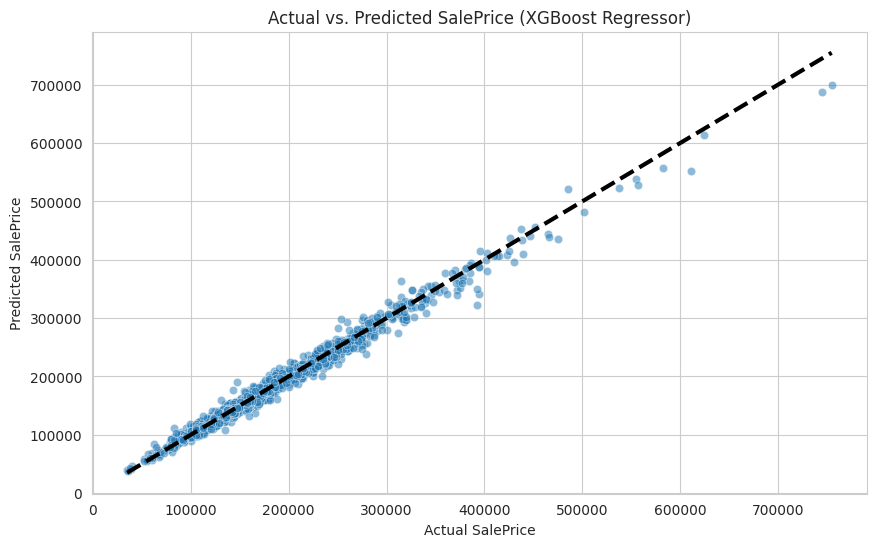

In [488]:
# Predict on the entire dataset using the best XGBoost model
y_pred_xgbr = best_xgbr_model.predict(X_preprocessed_df)

# Visualize Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=np.expm1(y_transformed), y=np.expm1(y_pred_xgbr), alpha=0.5)
plt.plot([np.expm1(y_transformed).min(), np.expm1(y_transformed).max()], [np.expm1(y_transformed).min(), np.expm1(y_transformed).max()], 'k--', lw=3)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs. Predicted SalePrice (XGBoost Regressor)')
plt.show()


[I 2024-05-23 21:01:51,989] A new study created in memory with name: no-name-d7a49ca0-31ea-4744-9471-31ef3abfd6d2
[I 2024-05-23 21:01:52,906] Trial 0 finished with value: 0.15372135298116063 and parameters: {'n_estimators': 144, 'max_depth': 29, 'min_samples_split': 15, 'min_samples_leaf': 12, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.15372135298116063.
[I 2024-05-23 21:01:53,239] Trial 1 finished with value: 0.1635542417775645 and parameters: {'n_estimators': 64, 'max_depth': 27, 'min_samples_split': 13, 'min_samples_leaf': 15, 'max_features': 'log2'}. Best is trial 0 with value: 0.15372135298116063.
[I 2024-05-23 21:01:54,748] Trial 2 finished with value: 0.14815692294116484 and parameters: {'n_estimators': 258, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 2 with value: 0.14815692294116484.
[I 2024-05-23 21:01:55,723] Trial 3 finished with value: 0.14625342758697044 and parameters: {'n_estimators': 158, 'max_depth'

Best trial for Random Forest Regressor: {'n_estimators': 242, 'max_depth': 21, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


 99%|===================| 1445/1460 [01:23<00:00]        

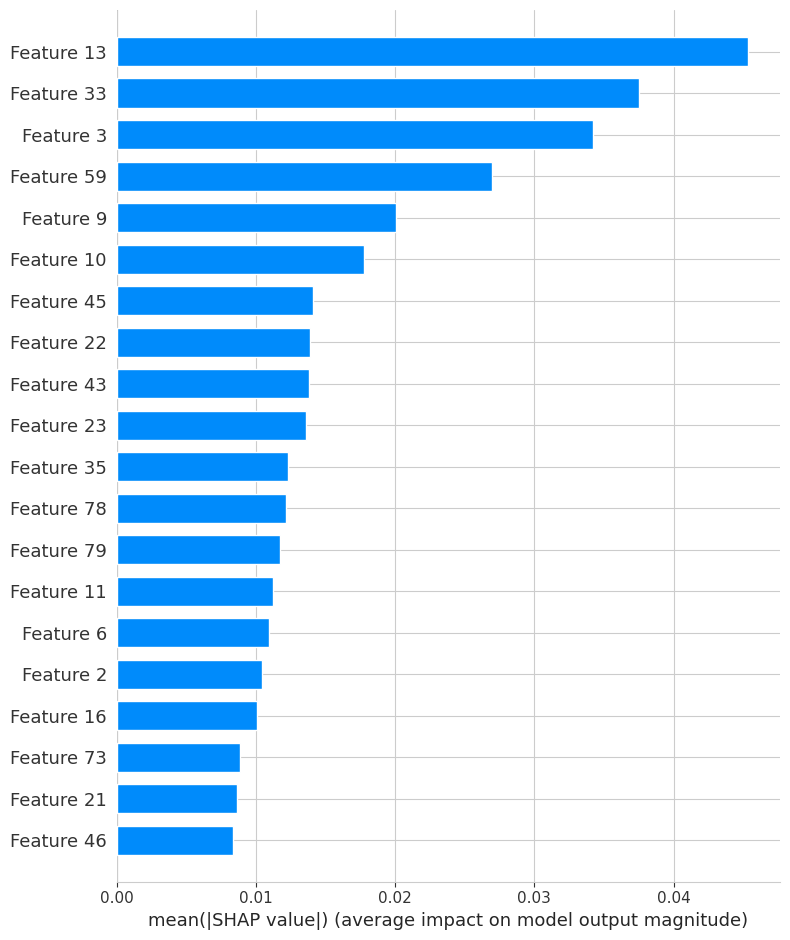

Best RMSLE: 0.13480152100962656


In [489]:
# Define the objective function
def objective_rfr(trial):
    # Define hyperparameters
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    }
    
    # Initialize model
    model = RandomForestRegressor(**params)
    
    # Perform cross-validation with RMSLE as the scoring metric
    cv_scores = cross_val_score(model, X_preprocessed_df, y_transformed, cv=5, scoring='neg_mean_squared_error')
    
    # Convert negative mean squared error to positive RMSLE
    rmsle_scores = np.sqrt(-cv_scores)
    mean_rmsle = np.mean(rmsle_scores)
    
    return mean_rmsle

# Run optimization
study_rfr = optuna.create_study(direction='minimize', sampler=TPESampler(seed=42))
study_rfr.optimize(objective_rfr, n_trials=100)

# Retrieve the best trial
best_trial = study_rfr.best_trial
print(f"Best trial for Random Forest Regressor: {study_rfr.best_trial.params}")

# Train the model with the best parameters
best_params = best_trial.params
best_rfr_model = RandomForestRegressor(**best_params)
best_rfr_model.fit(X_preprocessed_df, y_transformed)

# Initialize the SHAP Explainer
explainer = shap.Explainer(best_rfr_model, X_preprocessed_df)

# Calculate SHAP values for the preprocessed data
shap_values = explainer(X_preprocessed_df)

# Visualize the SHAP values with a summary plot
shap.summary_plot(shap_values, X_preprocessed_df, plot_type="bar")

# Use the cross-validation RMSLE from the best trial for the final evaluation
best_rmsle = study_rfr.best_value
print(f'Best RMSLE: {best_rmsle}')

In [490]:
# Optimization History
fig1 = vis.plot_optimization_history(study_rfr)
fig1.update_layout(title='Optimization History for Random Forest Regressor')
fig1.show()

In [491]:
# Hyperparameter Importance
fig2 = vis.plot_param_importances(study_rfr)
fig2.update_layout(title='Hyperparameter Importance for Random Forest Regressor')
fig2.show()

In [492]:
# Parallel Coordinate Plot
fig3 = vis.plot_parallel_coordinate(study_rfr)
fig3.update_layout(title='Parallel Coordinate Plot for Random Forest Regressor')
fig3.show()

In [493]:
# Slice Plot
fig4 = vis.plot_slice(study_rfr)
fig4.update_layout(title='Slice Plot for Random Forest Regressor')
fig4.show()

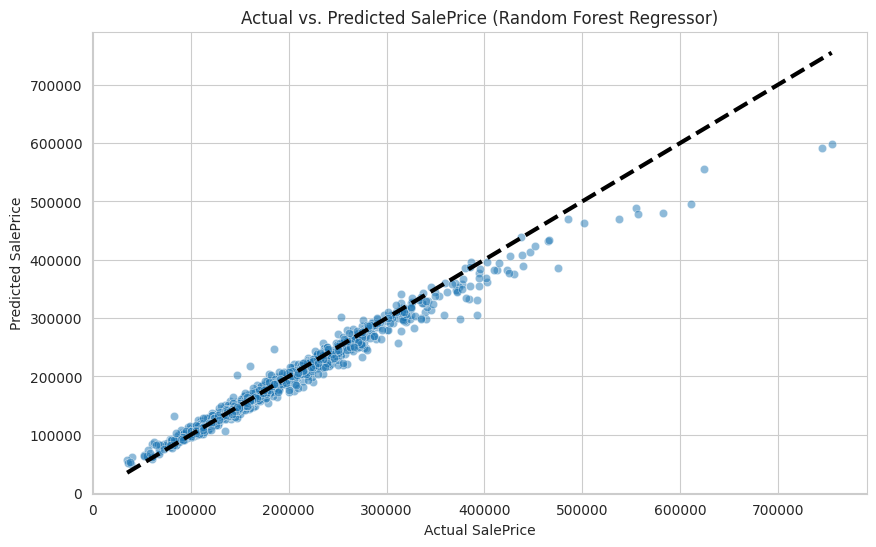

In [494]:

# Predict on the entire dataset using the best Random Forest model
y_pred_rfr = best_rfr_model.predict(X_preprocessed_df)

# Visualize Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=np.expm1(y_transformed), y=np.expm1(y_pred_rfr), alpha=0.5)
plt.plot([np.expm1(y_transformed).min(), np.expm1(y_transformed).max()], [np.expm1(y_transformed).min(), np.expm1(y_transformed).max()], 'k--', lw=3)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs. Predicted SalePrice (Random Forest Regressor)')
plt.show()

In [495]:
# Define the objective function
def objective_svr(trial):
    # Define hyperparameters
    params = {
        'C': trial.suggest_float('C', 1e-2, 10.0, log=True),
        'epsilon': trial.suggest_float('epsilon', 1e-4, 1.0, log=True),
        'gamma': trial.suggest_categorical('gamma', ['scale', 'auto'])
    }
    
    # Initialize model
    model = SVR(**params)
    
    # Perform cross-validation with RMSLE as the scoring metric
    cv_scores = cross_val_score(model, X_preprocessed_df, y_transformed, cv=5, scoring='neg_mean_squared_error')
    
    # Convert negative mean squared error to positive RMSLE
    rmsle_scores = np.sqrt(-cv_scores)
    mean_rmsle = np.mean(rmsle_scores)
    
    return mean_rmsle

# Run optimization
study_svr = optuna.create_study(direction='minimize', sampler=TPESampler(seed=42))
study_svr.optimize(objective_svr, n_trials=100)

# Retrieve the best trial
best_svr_params = study_svr.best_trial.params
print(f"Best trial for SVR: {study_svr.best_trial.params}")

# Train the model with the best parameters
best_svr_model = SVR(**best_svr_params)
best_svr_model.fit(X_preprocessed_df, y_transformed)

# Initialize the SHAP Explainer
explainer = shap.KernelExplainer(best_svr_model.predict, X_preprocessed_df[:100])  # Use a subset for kernel SHAP

# Calculate SHAP values for the preprocessed data
shap_values = explainer.shap_values(X_preprocessed_df[:100])

# Use the cross-validation RMSLE from the best trial for the final evaluation
best_rmsle = study_svr.best_value
print(f'Best RMSLE: {best_rmsle}')

[I 2024-05-23 21:06:28,886] A new study created in memory with name: no-name-50a47a60-8cba-4bc5-86d8-a3e09c3ed355
[I 2024-05-23 21:06:28,908] Trial 0 finished with value: 0.30361607306087024 and parameters: {'C': 0.13292918943162169, 'epsilon': 0.6351221010640696, 'gamma': 'scale'}. Best is trial 0 with value: 0.30361607306087024.
[I 2024-05-23 21:06:29,176] Trial 1 finished with value: 0.39632487513132836 and parameters: {'C': 0.02938027938703535, 'epsilon': 0.0004207053950287938, 'gamma': 'auto'}. Best is trial 0 with value: 0.30361607306087024.
[I 2024-05-23 21:06:29,432] Trial 2 finished with value: 0.38307156395994485 and parameters: {'C': 0.6358358856676253, 'epsilon': 0.06796578090758151, 'gamma': 'auto'}. Best is trial 0 with value: 0.30361607306087024.
[I 2024-05-23 21:06:29,755] Trial 3 finished with value: 0.38144634040572745 and parameters: {'C': 3.142880890840109, 'epsilon': 0.0007068974950624604, 'gamma': 'auto'}. Best is trial 0 with value: 0.30361607306087024.
[I 2024-0

Best trial for SVR: {'C': 9.898100414240538, 'epsilon': 0.0422239618245736, 'gamma': 'scale'}


  0%|          | 0/100 [00:00<?, ?it/s]

Best RMSLE: 0.22437237583437689


In [496]:
# Optimization History
fig1 = vis.plot_optimization_history(study_svr)
fig1.update_layout(title='Optimization History for SVR')
fig1.show()

In [497]:
# Hyperparameter Importance
fig2 = vis.plot_param_importances(study_svr)
fig2.update_layout(title='Hyperparameter Importance for SVR')
fig2.show()

In [498]:
# Parallel Coordinate Plot
fig3 = vis.plot_parallel_coordinate(study_svr)
fig3.update_layout(title='Parallel Coordinate Plot for SVR')
fig3.show()

In [499]:
# Slice Plot
fig4 = vis.plot_slice(study_svr)
fig4.update_layout(title='Slice Plot for SVR')
fig4.show()

[I 2024-05-23 21:26:32,490] A new study created in memory with name: no-name-05f7bc40-6d39-4713-a019-023ea4188a13
[I 2024-05-23 21:26:33,692] Trial 0 finished with value: 0.13812861006312055 and parameters: {'iterations': 144, 'learning_rate': 0.28570714885887566, 'depth': 8, 'l2_leaf_reg': 0.24810409748678125, 'bagging_temperature': 0.15601864044243652, 'border_count': 40}. Best is trial 0 with value: 0.13812861006312055.
[I 2024-05-23 21:26:34,608] Trial 1 finished with value: 0.12994800097743123 and parameters: {'iterations': 64, 'learning_rate': 0.2611910822747312, 'depth': 7, 'l2_leaf_reg': 0.679657809075816, 'bagging_temperature': 0.020584494295802447, 'border_count': 248}. Best is trial 1 with value: 0.12994800097743123.
[I 2024-05-23 21:26:35,746] Trial 2 finished with value: 0.12195424379270307 and parameters: {'iterations': 258, 'learning_rate': 0.07157834209670008, 'depth': 4, 'l2_leaf_reg': 0.00541524411940254, 'bagging_temperature': 0.3042422429595377, 'border_count': 134}

Best trial for CatBoost Regressor: {'iterations': 263, 'learning_rate': 0.06638075608978898, 'depth': 6, 'l2_leaf_reg': 0.027100396944113755, 'bagging_temperature': 0.3289539147669989, 'border_count': 237}


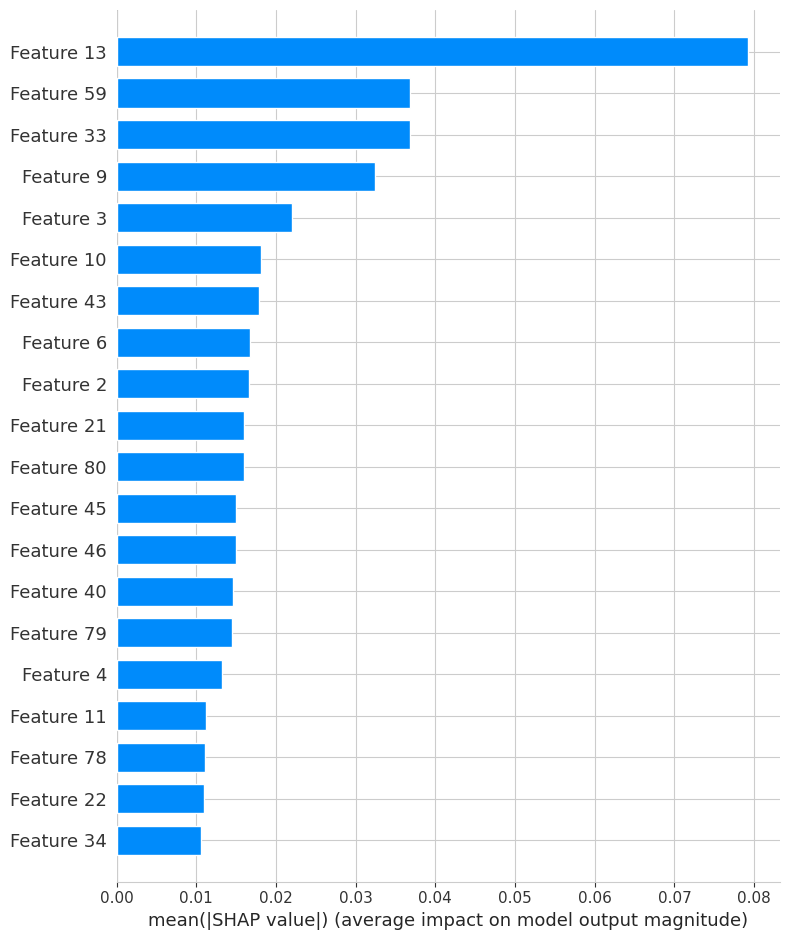

Best RMSLE: 0.11970839823097475


In [501]:
# Define the objective function
def objective_cat(trial):
    # Define hyperparameters
    params = {
        'iterations': trial.suggest_int('iterations', 50, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10.0, log=True),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'border_count': trial.suggest_int('border_count', 1, 255)
    }
    
    # Initialize model
    model = CatBoostRegressor(**params, verbose=0)
    
    # Perform cross-validation with RMSLE as the scoring metric
    cv_scores = cross_val_score(model, X_preprocessed_df, y_transformed, cv=5, scoring='neg_mean_squared_error')
    
    # Convert negative mean squared error to positive RMSLE
    rmsle_scores = np.sqrt(-cv_scores)
    mean_rmsle = np.mean(rmsle_scores)
    
    return mean_rmsle

# Run optimization
study_cat = optuna.create_study(direction='minimize', sampler=TPESampler(seed=42))
study_cat.optimize(objective_cat, n_trials=100)

# Retrieve the best trial
best_cat_params = study_cat.best_trial.params
print(f"Best trial for CatBoost Regressor: {study_cat.best_trial.params}")

# Train the model with the best parameters
best_cat_model = CatBoostRegressor(**best_cat_params, verbose=0)
best_cat_model.fit(X_preprocessed_df, y_transformed)

# Initialize the SHAP Explainer
explainer = shap.TreeExplainer(best_cat_model)

# Calculate SHAP values for the preprocessed data
shap_values = explainer.shap_values(X_preprocessed_df)

# Visualize the SHAP values with a summary plot
shap.summary_plot(shap_values, X_preprocessed_df, plot_type="bar")

# Use the cross-validation RMSLE from the best trial for the final evaluation
best_rmsle = study_cat.best_value
print(f'Best RMSLE: {best_rmsle}')

In [502]:
# Optimization History
fig1 = vis.plot_optimization_history(study_cat)
fig1.update_layout(title='Optimization History for CatBoost Regressor')
fig1.show()

In [503]:
# Hyperparameter Importance
fig2 = vis.plot_param_importances(study_cat)
fig2.update_layout(title='Hyperparameter Importance for CatBoost Regressor')
fig2.show()

In [504]:
# Parallel Coordinate Plot
fig3 = vis.plot_parallel_coordinate(study_cat)
fig3.update_layout(title='Parallel Coordinate Plot for CatBoost Regressor')
fig3.show()

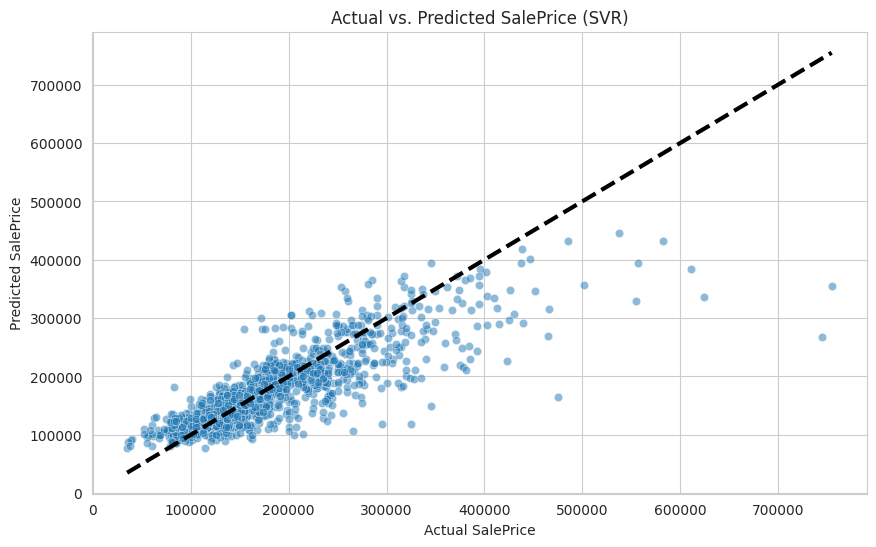

In [500]:
# Predict on the entire dataset using the best SVR model
y_pred_svr = best_svr_model.predict(X_preprocessed_df)

# Visualize Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=np.expm1(y_transformed), y=np.expm1(y_pred_svr), alpha=0.5)
plt.plot([np.expm1(y_transformed).min(), np.expm1(y_transformed).max()], [np.expm1(y_transformed).min(), np.expm1(y_transformed).max()], 'k--', lw=3)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs. Predicted SalePrice (SVR)')
plt.show()

In [505]:
# Slice Plot
fig4 = vis.plot_slice(study_cat)
fig4.update_layout(title='Slice Plot for CatBoost Regressor')
fig4.show()

In [507]:
# Load the test data
test = pd.read_csv('test.csv', index_col='Id')

# Transform the test data
X_test_preprocessed = pipeline.transform(test)

# Example: Using the best model (e.g., best_cat_model)
# Train the model on the entire training data
best_cat_model.fit(X_preprocessed, y_transformed)

# Make predictions on the test data
y_pred_test = best_cat_model.predict(X_test_preprocessed)

# Reverse the log transformation on the predictions
y_pred_test_exp = np.expm1(y_pred_test)

# Prepare the submission file
submission = pd.DataFrame({
    'Id': test.index,
    'SalePrice': y_pred_test_exp
})

# Save the submission file as submission.csv
submission.to_csv('submission_cat_boost.csv', index=False)

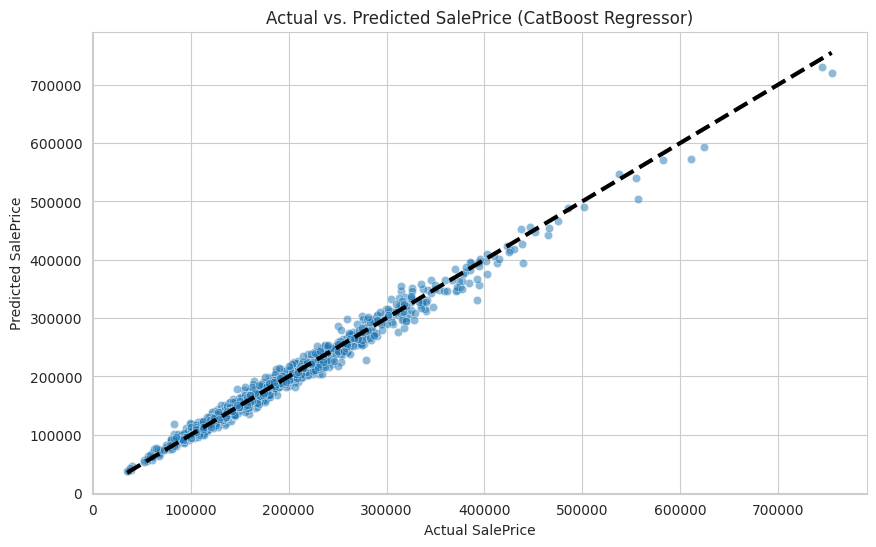

In [506]:
# Predict on the entire dataset using the best CatBoost model
y_pred_cat = best_cat_model.predict(X_preprocessed_df)

# Visualize Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=np.expm1(y_transformed), y=np.expm1(y_pred_cat), alpha=0.5)
plt.plot([np.expm1(y_transformed).min(), np.expm1(y_transformed).max()], [np.expm1(y_transformed).min(), np.expm1(y_transformed).max()], 'k--', lw=3)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs. Predicted SalePrice (CatBoost Regressor)')
plt.show()

In [508]:
# Train the model on the entire training data
best_boosting_model.fit(X_preprocessed, y_transformed)

# Make predictions on the test data
y_pred_test = best_boosting_model.predict(X_test_preprocessed)

# Reverse the log transformation on the predictions
y_pred_test_exp = np.expm1(y_pred_test)

# Prepare the submission file
submission = pd.DataFrame({
    'Id': test.index,
    'SalePrice': y_pred_test_exp
})

# Save the submission file as submission.csv
submission.to_csv('submission_boosting.csv', index=False)

In [509]:
# Train the model on the entire training data
best_xgbr_model.fit(X_preprocessed, y_transformed)

# Make predictions on the test data
y_pred_test = best_xgbr_model.predict(X_test_preprocessed)

# Reverse the log transformation on the predictions
y_pred_test_exp = np.expm1(y_pred_test)

# Prepare the submission file
submission = pd.DataFrame({
    'Id': test.index,
    'SalePrice': y_pred_test_exp
})

# Save the submission file as submission.csv
submission.to_csv('submission_xgbr.csv', index=False)

In [510]:
# Train the model on the entire training data
best_rfr_model.fit(X_preprocessed, y_transformed)

# Make predictions on the test data
y_pred_test = best_rfr_model.predict(X_test_preprocessed)

# Reverse the log transformation on the predictions
y_pred_test_exp = np.expm1(y_pred_test)

# Prepare the submission file
submission = pd.DataFrame({
    'Id': test.index,
    'SalePrice': y_pred_test_exp
})

# Save the submission file as submission.csv
submission.to_csv('submission_rfr.csv', index=False)

In [511]:
# Train the model on the entire training data
best_svr_model.fit(X_preprocessed, y_transformed)

# Make predictions on the test data
y_pred_test = best_svr_model.predict(X_test_preprocessed)

# Reverse the log transformation on the predictions
y_pred_test_exp = np.expm1(y_pred_test)

# Prepare the submission file
submission = pd.DataFrame({
    'Id': test.index,
    'SalePrice': y_pred_test_exp
})

# Save the submission file as submission.csv
submission.to_csv('submission_svr.csv', index=False)

In [512]:
# Train the model on the entire training data
best_lasso.fit(X_preprocessed, y_transformed)

# Make predictions on the test data
y_pred_test = best_lasso.predict(X_test_preprocessed)

# Reverse the log transformation on the predictions
y_pred_test_exp = np.expm1(y_pred_test)

# Prepare the submission file
submission = pd.DataFrame({
    'Id': test.index,
    'SalePrice': y_pred_test_exp
})

# Save the submission file as submission.csv
submission.to_csv('submission_lasso.csv', index=False)

In [513]:
# Train the model on the entire training data
best_ridge.fit(X_preprocessed, y_transformed)

# Make predictions on the test data
y_pred_test = best_ridge.predict(X_test_preprocessed)

# Reverse the log transformation on the predictions
y_pred_test_exp = np.expm1(y_pred_test)

# Prepare the submission file
submission = pd.DataFrame({
    'Id': test.index,
    'SalePrice': y_pred_test_exp
})

# Save the submission file as submission.csv
submission.to_csv('submission_ridge.csv', index=False)

In [514]:
# Train the model on the entire training data
best_elastic_net.fit(X_preprocessed, y_transformed)

# Make predictions on the test data
y_pred_test = best_elastic_net.predict(X_test_preprocessed)

# Reverse the log transformation on the predictions
y_pred_test_exp = np.expm1(y_pred_test)

# Prepare the submission file
submission = pd.DataFrame({
    'Id': test.index,
    'SalePrice': y_pred_test_exp
})

# Save the submission file as submission.csv
submission.to_csv('submission_elastic.csv', index=False)

In [519]:
import subprocess
import os

# Set up Kaggle API credentials
os.environ['KAGGLE_USERNAME'] = 'my_kaggle_username'
os.environ['KAGGLE_KEY'] = 'my_kaggle_api'

# List of submission files and their respective model names
submissions = [
    ("submission_cat_boost.csv", "CatBoost Model"),
    ("submission_boosting.csv", "Boosting Model"),
    ("submission_xgbr.csv", "XGBoost Regressor Model"),
    ("submission_rfr.csv", "Random Forest Regressor Model"),
    ("submission_svr.csv", "SVR Model"),
    ("submission_lasso.csv", "Lasso Model"),
    ("submission_ridge.csv", "Ridge Model"),
    ("submission_elastic.csv", "Elastic Net Model")
]

# Competition name
competition_name = "house-prices-advanced-regression-techniques"

# Function to submit to Kaggle
def submit_to_kaggle(file_name, model_name, competition_name):
    message = f"Submission for {model_name}"
    command = f"kaggle competitions submit -c {competition_name} -f {file_name} -m '{message}'"
    try:
        output = subprocess.run(command, shell=True, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        print(f"Successfully submitted {file_name}")
        print(output.stdout.decode())
    except subprocess.CalledProcessError as e:
        print(f"Failed to submit {file_name}. Error: {e.stderr.decode()}")

# Submit all files
for file_name, model_name in submissions:
    submit_to_kaggle(file_name, model_name, competition_name)


Successfully submitted submission_cat_boost.csv
Successfully submitted to House Prices - Advanced Regression Techniques
Successfully submitted submission_boosting.csv
Successfully submitted to House Prices - Advanced Regression Techniques
Successfully submitted submission_xgbr.csv
Successfully submitted to House Prices - Advanced Regression Techniques
Successfully submitted submission_rfr.csv
Successfully submitted to House Prices - Advanced Regression Techniques
Successfully submitted submission_svr.csv
Successfully submitted to House Prices - Advanced Regression Techniques
Successfully submitted submission_lasso.csv
Successfully submitted to House Prices - Advanced Regression Techniques
Successfully submitted submission_ridge.csv
Successfully submitted to House Prices - Advanced Regression Techniques
Successfully submitted submission_elastic.csv
Successfully submitted to House Prices - Advanced Regression Techniques
